# 숙제 3일차

-- 공통 사항 --
※ 데이터는 ( train(0.4) : validation(0.3) : test(0.3) )의 비율로 분할 (train_test_split 활용)
 0. train_test_split 함수를 이용하여 train:test로 데이터 분할. 분할된 train 데이터를 재 분할하여 validation 데이터로 사용
 1. train 데이터: 모델 훈련 
 2. validation 데이터: 최적의 parameter 찾기(과정의 [연습/실습]에서 test 데이터 역할)
 3. test 데이터: 2에서 찾은 최적의 parameter를 이용하여 만든 모델로 최종 성능 확인(단 한 번만 사용할 것)

# 숙제 1 의사결정나무_예측

콘크리트 강도를 예측하는 의사결정나무 모델을 만들고 predict method를 이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라. 

데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)

목표변수(Concrete_compressive_strength)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns #데이터 시각화(추세 등) 패키지
from sklearn.preprocessing import scale, minmax_scale, robust_scale #Scaling클래스

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
matplotlib.rc("font",family = "Malgun Gothic")

In [4]:
df_raw = pd.read_csv("/home/pirl/Downloads/Concrete.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df_raw_y=df_raw["CONCRETE_COMPRESSIVE_STRENGTH"] #목표변수 설정
df_raw_x=df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis=1, inplace=False) #설명변수 설정

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.6, random_state =1234)
df_validation_x, df_test_x, df_validation_y, df_test_y = train_test_split(df_test_x, df_test_y, test_size = 0.5, random_state =1234)
#train 0.4 test 0.3 validation 0.3으로 분할


(412, 8)
(412,)
(309, 8)
(309,)
(309, 8)
(309,)


In [170]:
tree_uncustomized = DecisionTreeRegressor(random_state =1234)
tree_uncustomized.fit(df_validation_x, df_validation_y)
print("Socor on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on Validation set: {:.3f}".format(tree_uncustomized.score(df_validation_x, df_validation_y)))
tree_uncustomized #과적합 되어 있다.

Socor on training set: 0.702
Score on Validation set: 1.000


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [171]:
train_score = []; validation_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score

In [172]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,1,0.995,0.812
1,2,0.975,0.778
2,3,0.949,0.804
3,4,0.932,0.784
4,5,0.910,0.801
5,6,0.894,0.782
6,7,0.882,0.770
7,8,0.872,0.767
8,9,0.846,0.767
9,10,0.837,0.751


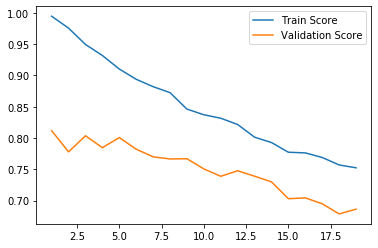

In [173]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, validation_score, linestyle = "-", label = "Validation Score")
plt.legend()
#3과 5 선택해서 비교

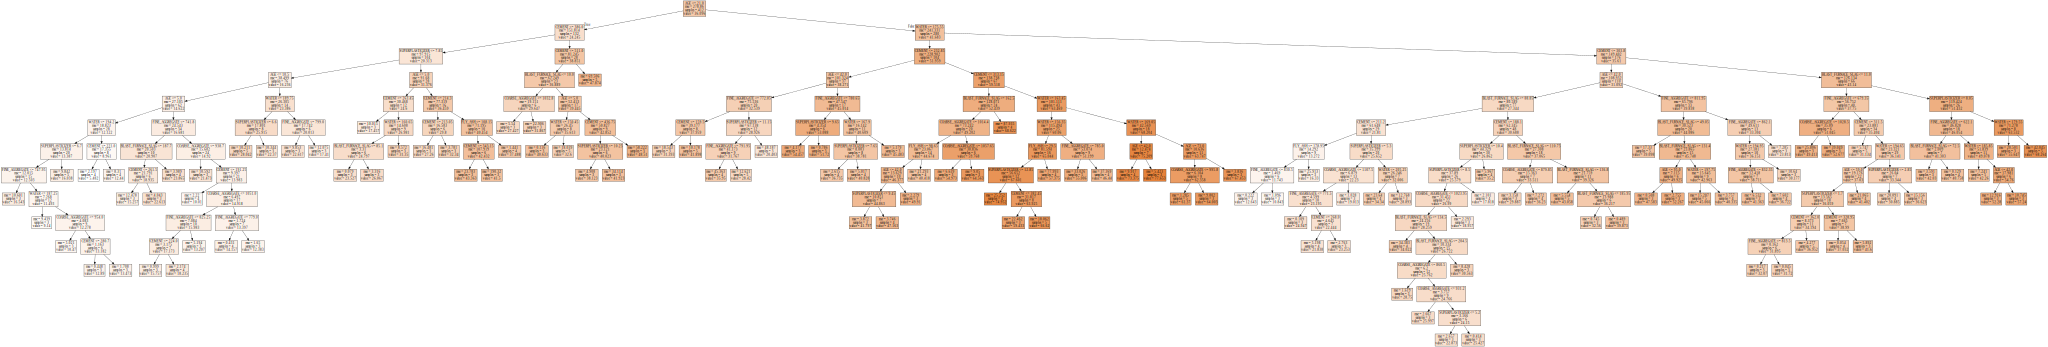

In [174]:
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 3모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=3)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

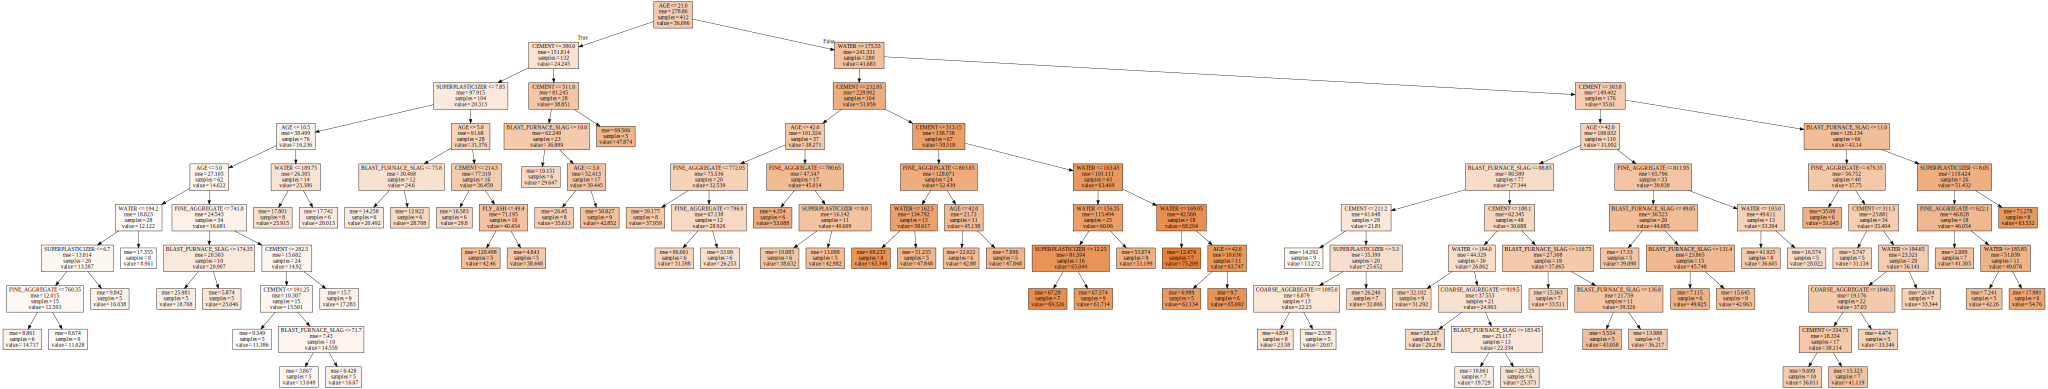

In [175]:
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 5모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [176]:
train_score = []; validation_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = validation_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,4,0.910,0.803
1,6,0.910,0.803
2,8,0.910,0.803
3,10,0.910,0.803
4,12,0.903,0.805
5,14,0.889,0.782
6,16,0.886,0.784
7,18,0.872,0.770
8,20,0.864,0.756
9,22,0.853,0.746


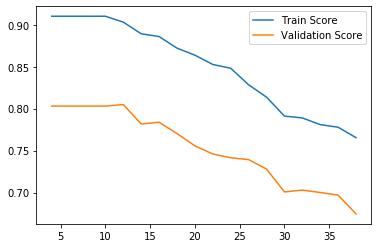

In [177]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, validation_score, linestyle = "-", label = "Validation Score")
plt.legend()
#12, 24선택

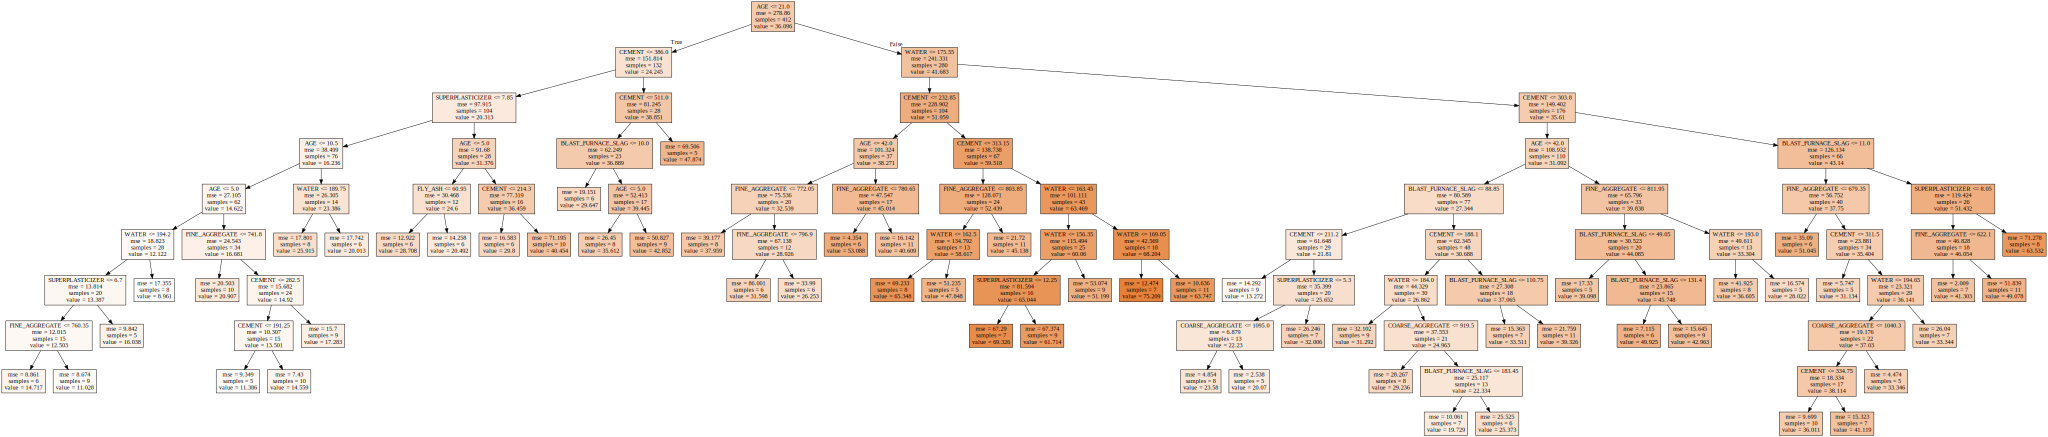

In [178]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=12)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

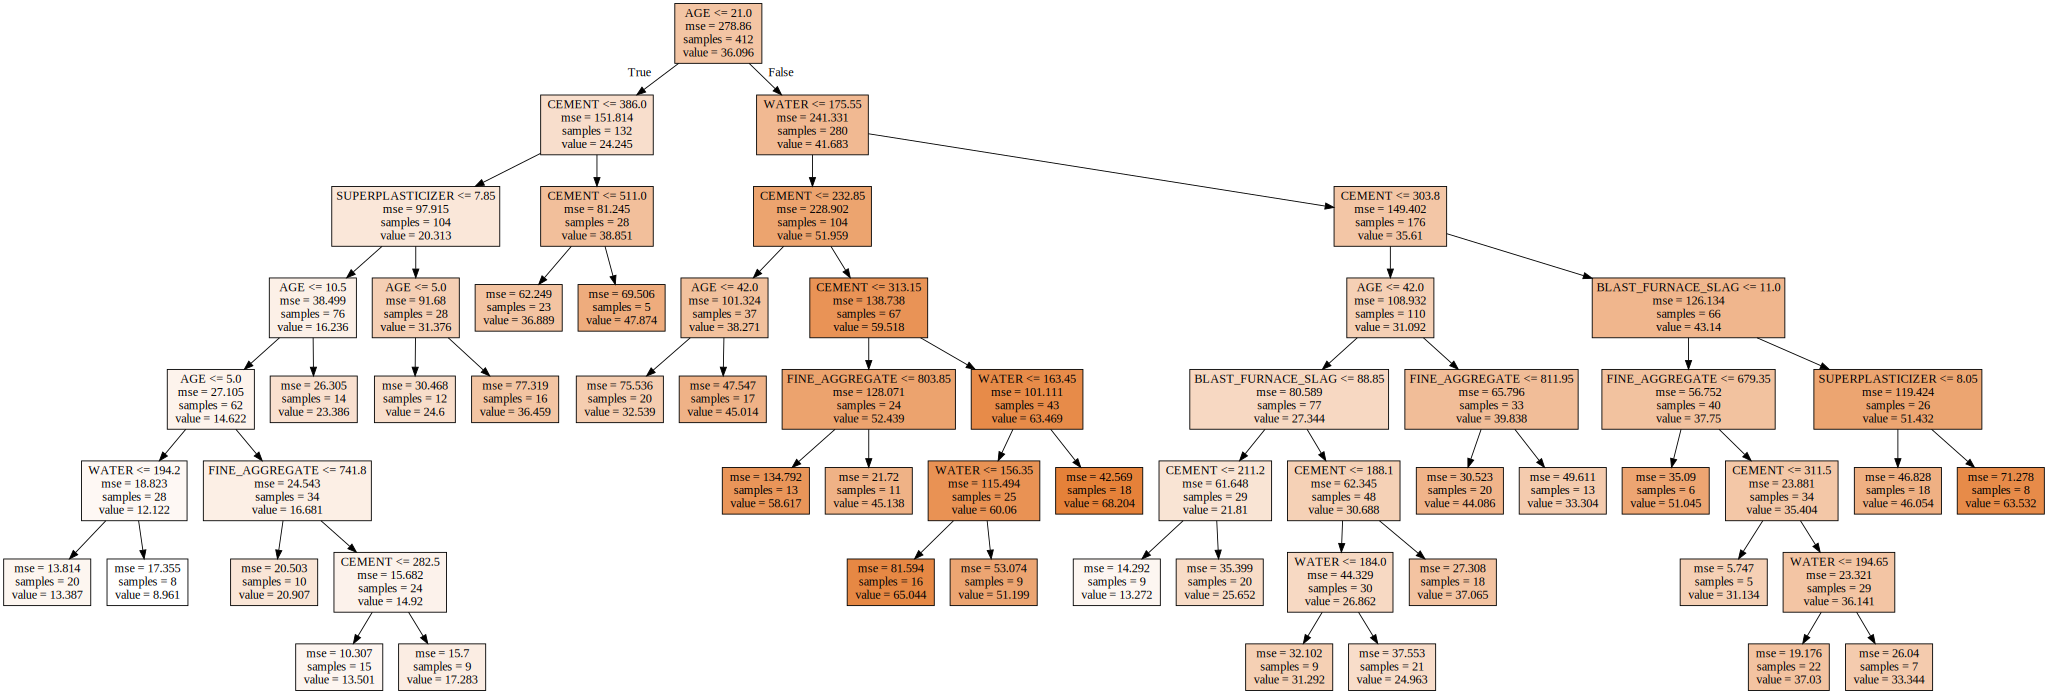

In [179]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=24)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

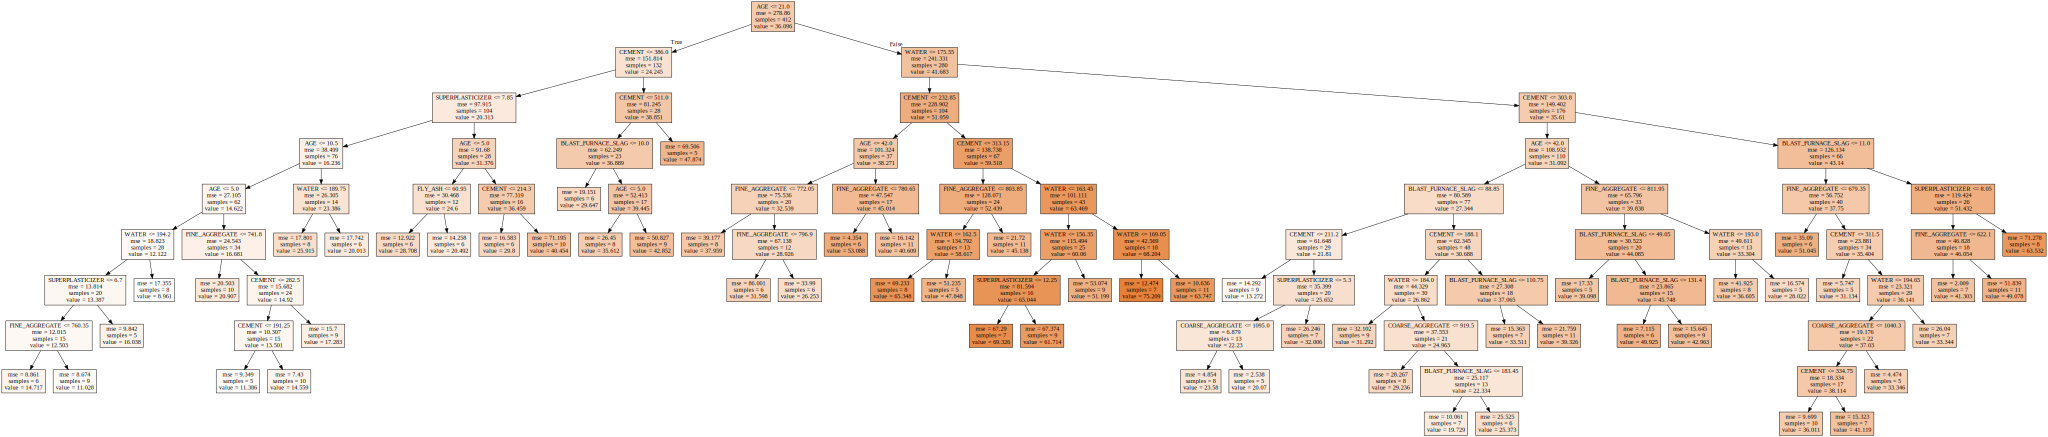

In [180]:
#12선택
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=12)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph)) 

In [181]:
#모델 파라미터 조정
train_score = []; validation_score = []
para_depth = [n_depth * 1 for n_depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5,min_samples_split = 12, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = validation_score
df_score_split.round(3)

,Depth,TrainScore,ValidationScore
0,1,0.237,0.299
1,2,0.455,0.484
2,3,0.646,0.588
3,4,0.752,0.684
4,5,0.833,0.732
5,6,0.885,0.792
6,7,0.897,0.794
7,8,0.901,0.799
8,9,0.903,0.805
9,10,0.903,0.805


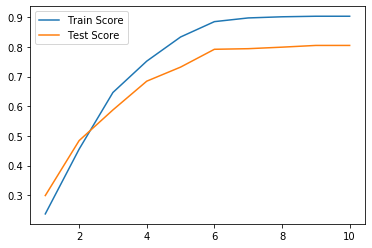

In [182]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, validation_score, linestyle = "-", label = "Test Score")
plt.legend()
#2, 4 선택

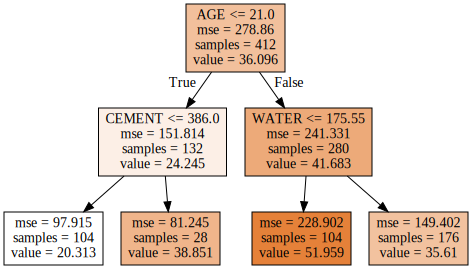

In [183]:
#최대 깊이=2모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=12,max_depth=2)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_split.dot",
feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [184]:
#최대 깊이=6모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_lea(test)f=5,min_samples_split=12,max_depth=4)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_split.dot",
feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
#2는 과소적합이므로 6선택

SyntaxError: invalid syntax (<ipython-input-184-6b3a8c145c74>, line 2)

In [185]:
#최종모델
tree_final = DecisionTreeRegressor(min_samples_leaf = 5, min_samples_split = 12, max_depth=4,random_state =1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

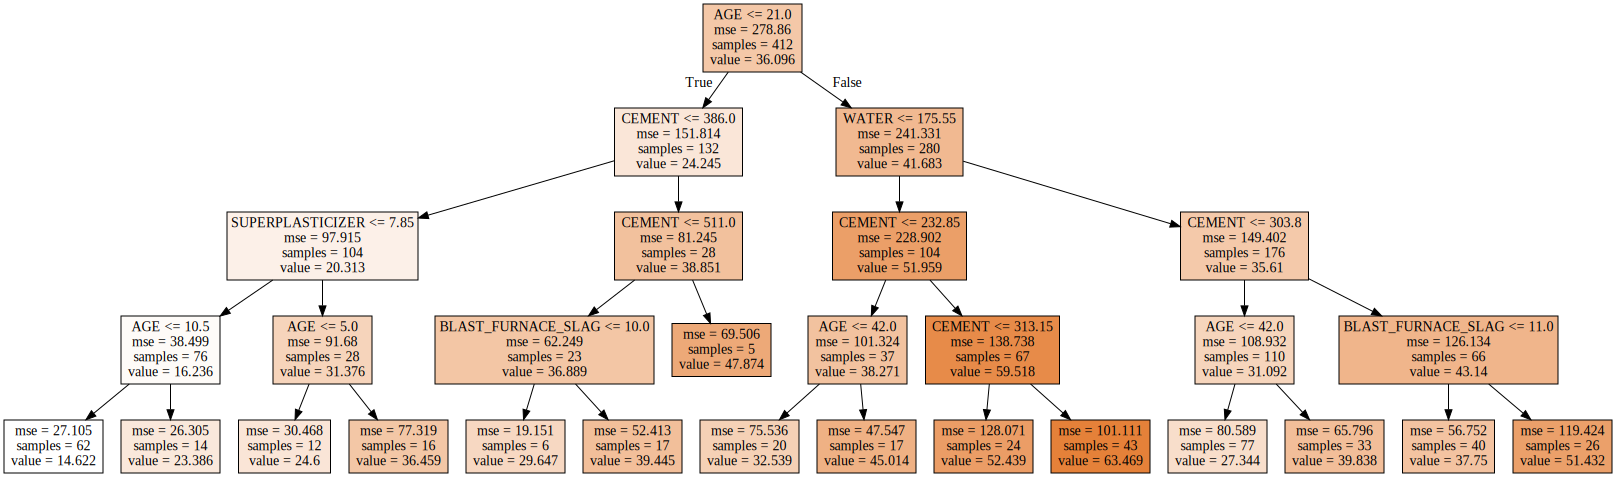

In [186]:
#최종모델 시각화
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
#트리 분리에 영향이 큰 변수는 AGE와 CEMENT

In [187]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.395
0,CEMENT,0.309
3,WATER,0.202
4,SUPERPLASTICIZER,0.054
1,BLAST_FURNACE_SLAG,0.039
2,FLY_ASH,0.000
5,COARSE_AGGREGATE,0.000
6,FINE_AGGREGATE,0.000


Text(0, 0.5, 'Variable')

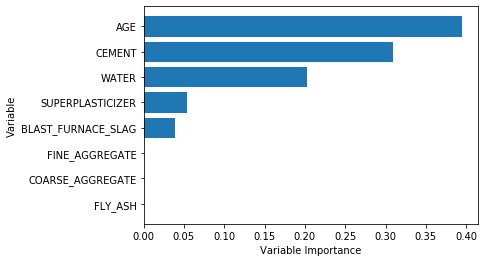

In [188]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

In [189]:
df_pred = pd.DataFrame({'prediction':tree_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,309.000000
mean,35.656685
std,14.308323
min,14.622097
25%,27.344286
50%,36.458750
75%,45.013529
max,63.469302


In [190]:
df_test_y.describe() #실제값 

count    309.000000
mean      35.449741
std       16.877131
min        6.280000
25%       23.520000
50%       33.760000
75%       45.900000
max       82.600000
Name: CONCRETE_COMPRESSIVE_STRENGTH, dtype: float64

test 결과 예측값과 실제값이 비슷하므로 잘 설계된 의사결정 나무이다

# 숙제 2 랜덤 포레스트_예측
콘크리트 강도를 예측하는 랜덤 포레스트 모델을 만들고 predict method를 이용하여 예측값을 구하라.그리고 모델의 mse와 mae를 산출하여 비교하라.

데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)

목표변수(Concrete_compressive_strength)

In [191]:
df_raw = pd.read_csv("/home/pirl/Downloads/Concrete.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [192]:
df_raw_y=df_raw["CONCRETE_COMPRESSIVE_STRENGTH"] #목표변수 설정
df_raw_x=df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis=1, inplace=False) #설명변수 설정

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.6, random_state =1234)
df_validation_x, df_test_x, df_validation_y, df_test_y = train_test_split(df_test_x, df_test_y, test_size = 0.5, random_state =1234)
#train 0.4 test 0.3 validation 0.3으로 분할

In [193]:
#기본 옵션으로 모델 생성
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on validation set:{:3f}".format(rf_uncustomized.score(df_validation_x, df_validation_y)))
#과적합 의심

Score on training set:0.974
Score on validation set:0.889187


In [194]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [195]:
train_score = []; validation_score =[]
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["ValidationScore"] = validation_score
df_score_n.round(3)

,n_estimators,TrainScore,ValidationScore
0,10,0.962,0.865
1,20,0.970,0.878
2,30,0.972,0.884
3,40,0.974,0.886
4,50,0.973,0.886
5,60,0.973,0.888
6,70,0.973,0.889
7,80,0.973,0.888
8,90,0.974,0.889
9,100,0.974,0.889


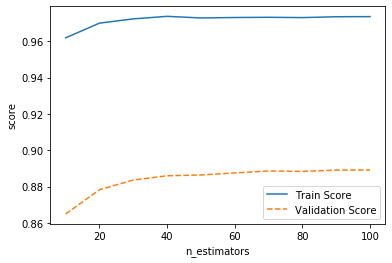

In [196]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, validation_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()
#30개를 초과해도 설명력이 거의 상승하지 않으나, 최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향을 확인하고자 100선택

In [197]:
train_score = []; validation_score =[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,1,0.974,0.889
1,2,0.958,0.883
2,3,0.939,0.873
3,4,0.922,0.864
4,5,0.906,0.853
5,6,0.890,0.841
6,7,0.876,0.832
7,8,0.862,0.820
8,9,0.850,0.810
9,10,0.838,0.801


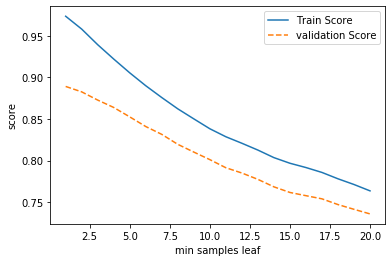

In [198]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
#Train과 Validation이 가장 적게 차이나는 14선택

In [199]:
train_score = []; validation_score =[]
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                              min_samples_leaf = 14, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["validationScore"] = validation_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,validationScore
0,4,0.804,0.768
1,6,0.804,0.768
2,8,0.804,0.768
3,10,0.804,0.768
4,12,0.804,0.768
5,14,0.804,0.768
6,16,0.804,0.768
7,18,0.804,0.768
8,20,0.804,0.768
9,22,0.804,0.768


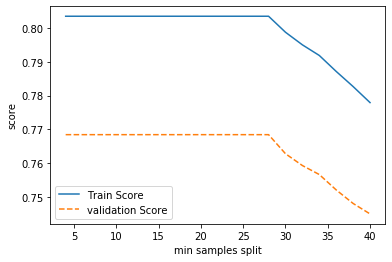

In [200]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()
#급격히 감소하는 28선택

In [201]:
train_score = []; validation_score =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                              min_samples_leaf = 14, min_samples_split = 28, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["validationScore"] = validation_score
df_score_depth.round(3)

,Depth,TrainScore,validationScore
0,1,0.338,0.360
1,2,0.598,0.610
2,3,0.724,0.705
3,4,0.782,0.753
4,5,0.800,0.766
5,6,0.803,0.768
6,7,0.804,0.768
7,8,0.804,0.768
8,9,0.804,0.768
9,10,0.804,0.768


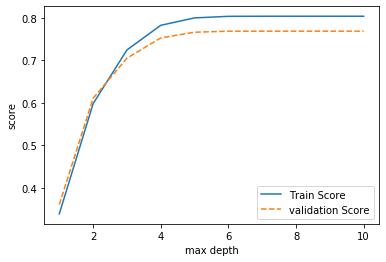

In [202]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
#값이 급격하게 변화하는 2선택

In [203]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 14,
                                min_samples_split  = 28, max_depth =2)
rf_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on validation set: {:.3}".format(rf_final.score(df_validation_x, df_validation_y)))

Score on training set: 0.598
Score on validation set: 0.61


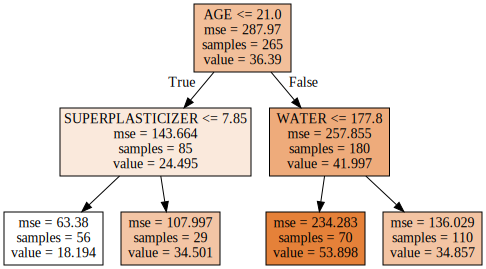

In [204]:
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

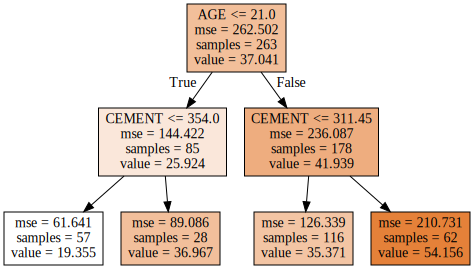

In [205]:
export_graphviz(rf_final.estimators_[1], out_file ="rfr_final_1.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

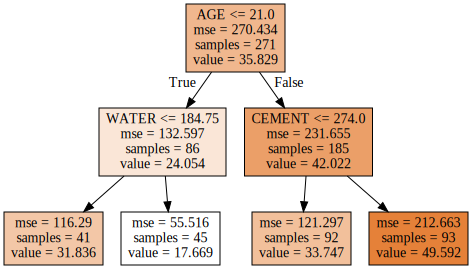

In [206]:
export_graphviz(rf_final.estimators_[10], out_file ="rfr_final_10.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [207]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.466
0,CEMENT,0.302
3,WATER,0.194
4,SUPERPLASTICIZER,0.038
1,BLAST_FURNACE_SLAG,0.000
2,FLY_ASH,0.000
5,COARSE_AGGREGATE,0.000
6,FINE_AGGREGATE,0.000


Text(0, 0.5, 'Variable')

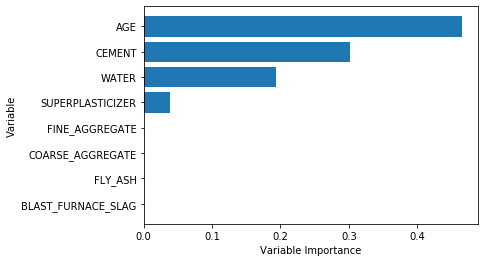

In [208]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

In [209]:
df_pred = pd.DataFrame({'prediction':rf_final.predict(df_test_x)}) #예측값
df_pred.describe()


,prediction
count,309.000000
mean,35.982021
std,9.306035
min,18.678978
25%,31.268078
50%,35.964054
75%,41.971017
max,53.074870


In [210]:
df_test_y.describe() #실제값

count    309.000000
mean      35.449741
std       16.877131
min        6.280000
25%       23.520000
50%       33.760000
75%       45.900000
max       82.600000
Name: CONCRETE_COMPRESSIVE_STRENGTH, dtype: float64

test 결과 예측값과 실제값이 비슷하므로 잘 설계된 랜덤포레스트이다

# 숙제 3 그래디언트 부스팅_예측
콘크리트 강도를 예측하는 그래디언트 부스팅 모델을 만들고 predict method를 이용하여 예측값을 구하라.그리고 모델의 mse와 mae를 산출하여 비교하라. 

데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)

목표변수(Concrete_compressive_strength)

In [211]:
df_raw = pd.read_csv("/home/pirl/Downloads/Concrete.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [212]:
df_raw_y=df_raw["CONCRETE_COMPRESSIVE_STRENGTH"] #목표변수 설정
df_raw_x=df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis=1, inplace=False) #설명변수 설정

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.6, random_state =1234)
df_validation_x, df_test_x, df_validation_y, df_test_y = train_test_split(df_test_x, df_test_y, test_size = 0.5, random_state =1234)
#train 0.4 test 0.3 validation 0.3으로 분할

In [213]:
#일반 모델 생성
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on validation set:{:.3f}".format(gb_uncustomized.score(df_validation_x, df_validation_y)))

Score on training set:0.949
Score on validation set:0.903


In [214]:
gb_uncustomized

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [215]:
#트리수 변경에 따른 성능모델
train_score = []; validation_score =[]
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["validationScore"] = validation_score
df_score_n.round(3)

,n_estimators,TrainScore,validationScore
0,10,0.635,0.610
1,20,0.800,0.764
2,30,0.863,0.825
3,40,0.893,0.855
4,50,0.911,0.872
5,60,0.922,0.880
6,70,0.931,0.888
7,80,0.938,0.894
8,90,0.944,0.899
9,100,0.949,0.903


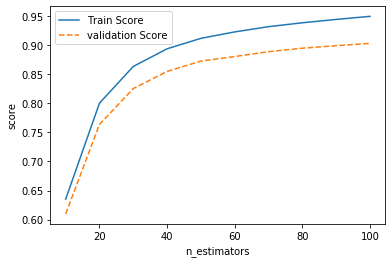

In [216]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()
#validation 성능 변화를 고려하여 20선택

In [217]:
train_score = []; validation_score =[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators = 20,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["validationScore"] = validation_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,validationScore
0,1,0.800,0.764
1,2,0.799,0.760
2,3,0.799,0.760
3,4,0.800,0.761
4,5,0.799,0.761
5,6,0.797,0.765
6,7,0.796,0.763
7,8,0.796,0.763
8,9,0.795,0.763
9,10,0.793,0.761


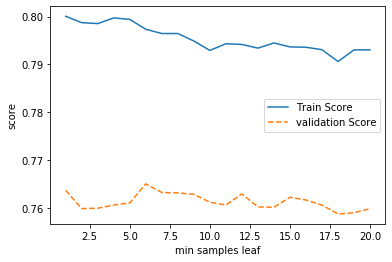

In [218]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
#15선택

In [219]:
train_score = []; validation_score = []
para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=20, min_samples_leaf=15, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["validationScore"] = validation_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,validationScore
0,2,0.794,0.762
1,4,0.794,0.762
2,6,0.794,0.762
3,8,0.794,0.762
4,10,0.794,0.762
5,12,0.794,0.762
6,14,0.794,0.762
7,16,0.794,0.762
8,18,0.794,0.762
9,20,0.794,0.762


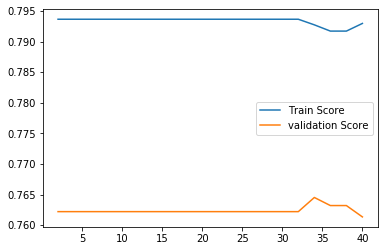

In [220]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, validation_score, linestyle = "-", label = "validation Score")
plt.legend()
#34선택

In [221]:
train_score = []; validation_score =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20,
                              min_samples_leaf = 15, min_samples_split = 34, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(df_validation_x, df_validation_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["validationScore"] = validation_score
df_score_depth.round(3)

,Depth,TrainScore,validationScore
0,1,0.486,0.481
1,2,0.696,0.679
2,3,0.793,0.765
3,4,0.844,0.804
4,5,0.864,0.823
5,6,0.872,0.822
6,7,0.878,0.823
7,8,0.879,0.826
8,9,0.879,0.827
9,10,0.880,0.827


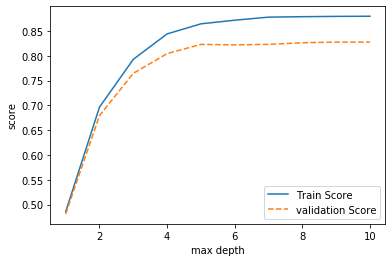

In [222]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
#2선택

In [223]:
train_score = []; validation_score =[]
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20,
                              min_samples_leaf = 15, min_samples_split = 34, max_depth=2, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(df_validation_x, df_validation_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["validationScore"] = validation_score
df_score_lr.round(3)

,LearningRate,TrainScore,validationScore
0,0.1,0.696,0.679
1,0.2,0.835,0.827
2,0.3,0.870,0.858
3,0.4,0.883,0.877
4,0.5,0.885,0.883
5,0.6,0.886,0.879
6,0.7,0.893,0.889
7,0.8,0.900,0.879
8,0.9,0.891,0.860


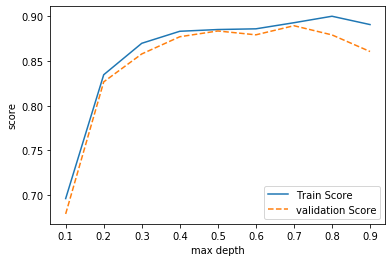

In [224]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
#0.2선택

In [225]:
gb_final = GradientBoostingRegressor(random_state = 1234, n_estimators=20, min_samples_leaf=15, min_samples_split=34, max_depth=2, learning_rate=0.2)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on validation set:{:.3f}".format(gb_final.score(df_validation_x, df_validation_y)))

Score on training set:0.835
Score on validation set:0.827


In [226]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.391
0,CEMENT,0.314
3,WATER,0.188
1,BLAST_FURNACE_SLAG,0.058
4,SUPERPLASTICIZER,0.025
6,FINE_AGGREGATE,0.024
5,COARSE_AGGREGATE,0.000
2,FLY_ASH,0.000


Text(0, 0.5, 'Variable')

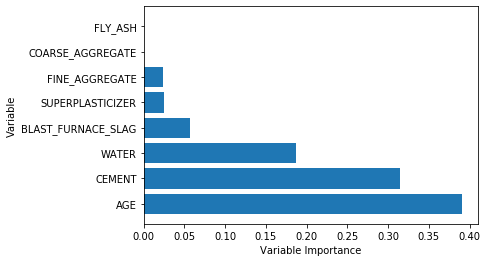

In [227]:
df_importance.sort_values("Importance",ascending=False, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width= df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

In [228]:
df_pred = pd.DataFrame({'prediction':gb_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,309.000000
mean,35.572256
std,13.051514
min,11.463714
25%,26.326457
50%,34.371997
75%,44.876964
max,65.865693


In [229]:
df_test_y.describe() #실제값

count    309.000000
mean      35.449741
std       16.877131
min        6.280000
25%       23.520000
50%       33.760000
75%       45.900000
max       82.600000
Name: CONCRETE_COMPRESSIVE_STRENGTH, dtype: float64

test 결과 예측값과 실제값이 비슷하므로 잘 설계된 그래디언트 부스팅이다